In [ ]:
'''Smayan Gupta
19/17067
Section-A
Bsc Physics Hons'''
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.sparse.linalg import eigsh

In [ ]:
#Constants
e=3.795
nth=5
epsilonpi=1
hpi=1973
m= (0.511*10**6)
n=1000

ri=1e-5
rf=10
x=np.linspace(ri,rf,n)
d=((rf-ri)/n)#x[1]-x[0]
#print(d)

#making kinetic energy operator
k=(hpi*hpi)/(2*m*d*d)


3.795

In [ ]:
A=1
B=-2
X=np.ones(n-1)*A*k
Y=np.ones(n)*B*k
K=np.diag(X,-1)+np.diag(Y,0)+np.diag(X,1)

#making laplace operator
l=0
L=np.zeros((n,n))
for i in range(0,n):
    L[i,i]= (hpi**2/(2*m))*(l*(l+1))/(x[i])**2
#print(L)


In [ ]:

#making potential operator
def scpotential(r):
  #screening constant
    sc=5
    return (e*e*np.exp(-r/sc))/(r)


V=np.zeros((n,n))
for i in range(0,n):
    r=ri+ (i+1)*d
    V[i,i]= scpotential(r)#x[i]) 
#print(V.ravel())



No handles with labels found to put in legend.
No handles with labels found to put in legend.


[-10.94571684  -1.27210306   0.45289994]


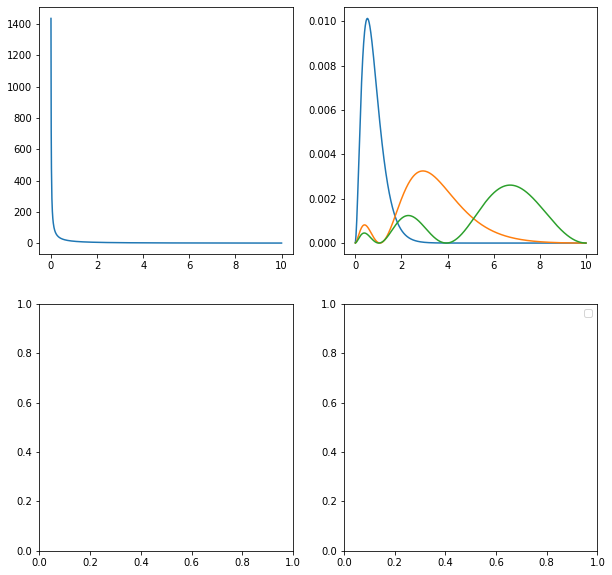

In [ ]:
H=-(K+V-L)
#H[0,0]=0
#H[n+2,n+2]=0
#print(H)

#energyvalues,vectors=sp.linalg.eig(H)
energyvalues,vectors=np.linalg.eigh(H)
#energyvalues,vectors=eigsh(H,k=10)
#print(vectors)
fig,axis= plt.subplots(2, 2, figsize=(10,10))
axis[0, 0].plot(x,np.diag(V))

x=np.linspace(ri,rf,n)
#plt.plot(x,np.diag(V))
#print(K)


#energyvalues = np.sort(energyvalues)
print(energyvalues[0:3])
plt.legend(fancybox=True)
#plt.plot(x,(vectors[4].T)**2)
#plt.plot(x,energyvalues*(-13.6))
#print(vectors[i].T)

#for i in range(0,nth+1):
 #   plt.axvline(x=orbital(i),color='k',ls='--',alpha=0.7)
for i in range(3):
    axis[0,1].plot(x,(vectors.T[i]**2),label='{} Energy level'.format(i))
plt.legend()
fig.show()
